In [1]:
pip install numpy

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [66]:
conda install -c gurobi gurobi

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('customer.csv', sep=";") #import the customers' database
dataset.head()

,CUSTOMER,XCOORD,YCOORD,DEMAND
0,1,45.96185,9.48839,12
1,2,46.04247,9.75783,13
2,3,45.97670,10.07397,4
3,4,46.02437,10.01440,3
4,5,45.97216,9.96527,7


In [4]:
n=len(dataset) #number of clients

In [5]:
n

15

In [6]:
p=2 #number of facilities to open

In [7]:
N = [i for i in range(0, n)] #number of customers

In [8]:
N

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [9]:
dataset2=pd.read_csv('facility.csv', sep=";") #import the dataset regarding the possible facilities
m=len(dataset2) #number of available facilities

In [10]:
dataset2.head()

,FACILITY,XCOORD,YCOORD
0,A,45.87190,9.65397
1,B,45.88900,9.91917
2,C,45.90737,10.03455
3,D,45.73153,9.72567
4,E,45.82182,9.59426


In [11]:
M = [i for i in range(0, m)] 

In [12]:
M

[0, 1, 2, 3, 4, 5]

In [13]:
q={i: dataset.iloc[i]['DEMAND'] for i in N} #extraction of customer demand
#q = {i: rnd.randint(1, 10) for i in N}

In [14]:
q

{0: 12.0,
 1: 13.0,
 2: 4.0,
 3: 3.0,
 4: 7.0,
 5: 14.0,
 6: 6.0,
 7: 11.0,
 8: 12.0,
 9: 2.0,
 10: 3.0,
 11: 2.0,
 12: 4.0,
 13: 4.0,
 14: 3.0}

In [15]:
xc = dataset['XCOORD'].tolist() #extract locations
yc = dataset['YCOORD'].tolist()

In [16]:
xc

[45.96185,
 46.04247,
 45.9767,
 46.02437,
 45.97216,
 46.00854,
 45.8864,
 45.93136,
 45.78389,
 45.9849,
 45.8824,
 45.92231,
 45.82079,
 45.95756,
 45.7976]

In [17]:
yc

[9.48839,
 9.75783,
 10.07397,
 10.0144,
 9.96527,
 10.16354,
 10.09187,
 10.08434,
 9.75608,
 9.71943,
 9.77693,
 9.58228,
 9.79811,
 9.82459,
 9.52964]

In [18]:
xf = dataset2['XCOORD'].tolist() #extract locations of the facilities
yf = dataset2['YCOORD'].tolist()

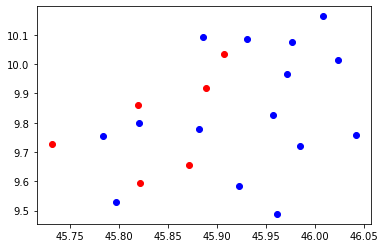

In [19]:
#plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r')

In [20]:
A = [(i, j) for i in N for j in M]
Y = [(j) for j in M]


In [21]:
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'kilometers'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'kilometers':
        return round(distance * 1.609344, 2)

In [22]:
c = {(i, j): getDistanceBetweenPointsNew(xc[i], yc[i], xf[j], yf[j], 'kilometers') for i in N for j in M}
 #distance between customers and facilities

In [23]:
c

{(0, 0): 16.25,
 (0, 1): 34.29,
 (0, 2): 42.67,
 (0, 3): 31.52,
 (0, 4): 17.59,
 (0, 5): 32.73,
 (1, 0): 20.59,
 (1, 1): 21.13,
 (1, 2): 26.13,
 (1, 3): 34.66,
 (1, 4): 27.6,
 (1, 5): 25.93,
 (2, 0): 34.51,
 (2, 1): 15.44,
 (2, 2): 8.29,
 (2, 3): 38.35,
 (2, 4): 40.92,
 (2, 5): 24.08,
 (3, 0): 32.62,
 (3, 1): 16.76,
 (3, 2): 13.1,
 (3, 3): 39.49,
 (3, 4): 39.54,
 (3, 5): 25.7,
 (4, 0): 26.53,
 (4, 1): 9.91,
 (4, 2): 8.98,
 (4, 3): 32.56,
 (4, 4): 33.22,
 (4, 5): 18.8,
 (5, 0): 42.23,
 (5, 1): 23.1,
 (5, 2): 15.03,
 (5, 3): 45.8,
 (5, 4): 48.69,
 (5, 5): 31.53,
 (6, 0): 33.93,
 (6, 1): 13.37,
 (6, 2): 5.01,
 (6, 3): 33.2,
 (6, 4): 39.2,
 (6, 5): 19.49,
 (7, 0): 33.95,
 (7, 1): 13.62,
 (7, 2): 4.68,
 (7, 3): 35.58,
 (7, 4): 39.84,
 (7, 5): 21.39,
 (8, 0): 12.58,
 (8, 1): 17.21,
 (8, 2): 25.57,
 (8, 3): 6.28,
 (8, 4): 13.23,
 (8, 5): 8.93,
 (9, 0): 13.55,
 (9, 1): 18.77,
 (9, 2): 25.84,
 (9, 3): 28.18,
 (9, 4): 20.56,
 (9, 5): 21.27,
 (10, 0): 9.59,
 (10, 1): 11.03,
 (10, 2): 20.13,
 (10,

In [23]:
#conda install -c gurobi gurobi

In [24]:
#pip install gurobipy

In [25]:
from gurobipy import Model, GRB, quicksum

In [26]:
mdl = Model('PMEDIAN')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-23


In [27]:
x = mdl.addVars(A, vtype=GRB.BINARY)
y = mdl.addVars(Y, vtype=GRB.BINARY)

In [28]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j]*q[i] for i, j in A))


In [29]:
mdl.addConstr(quicksum(y[j] for j in M) == p)
mdl.addConstrs(quicksum(x[i, j] for j in M) == 1 for i in N)
mdl.addConstrs(x[i, j]<=y[j] for i in N for j in M)

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (3, 0): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,


In [30]:
#mdl.Params.MIPGap = 0.1
#mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 106 rows, 96 columns and 276 nonzeros
Model fingerprint: 0xe75f2fa6
Variable types: 0 continuous, 96 integer (96 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 7e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 2199.7700000
Presolve time: 0.00s
Presolved: 106 rows, 96 columns, 276 nonzeros
Variable types: 0 continuous, 96 integer (96 binary)
Found heuristic solution: objective 2139.6300000

Root relaxation: objective 1.265870e+03, 37 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1265.8700000 1265.87000  0.00%     -    0s

Explored 1 nodes (37 simplex ite

In [31]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [32]:
active_arcs

[(0, 0),
 (1, 0),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0)]

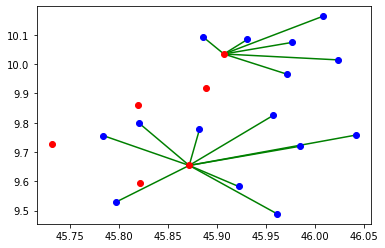

In [33]:
for i, j in active_arcs:
     plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g', zorder=0)
plt.scatter(xc[0:], yc[0:], c='b')
plt.scatter(xf[0:], yf[0:], c='r')

In [34]:
demand_satisfied=0;
dist=0;
for i in range(n):
    for j in range(m):
        if ((x[i,j].x>0.99)and(c[i,j]<20)):
            demand_satisfied=demand_satisfied+q[i];



In [35]:
demand_satisfied

87.0